In [21]:
import pandas as pd

import numpy as np


In [22]:
data=pd.read_csv('hierarchical - hierarchical.csv')

In [23]:
data

x         y          z
0    153.588500  33.07160   46.68676
1     36.024890  41.39830  127.10090
2      4.513605  42.45976  132.80750
3    146.028700  37.32747   57.05478
4     44.393090  43.69293  118.49990
..          ...       ...        ...
195   13.202020  69.17549  133.61880
196   31.591070  35.88656   64.00113
197  151.950800  37.89974   64.29086
198   84.047910  52.82800   53.47007
199  128.861200  51.22401   57.76302

[200 rows x 3 columns]

            x         y          z
0  153.588500  33.07160   46.68676
1   36.024890  41.39830  127.10090
2    4.513605  42.45976  132.80750
3  146.028700  37.32747   57.05478
4   44.393090  43.69293  118.49990
(200, 3)


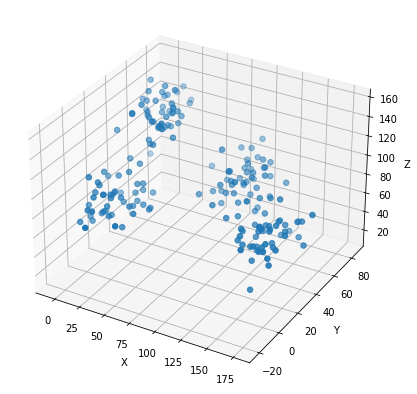

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
print(data.head())
print(data.shape)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x'], data['y'], data['z'], s=30)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


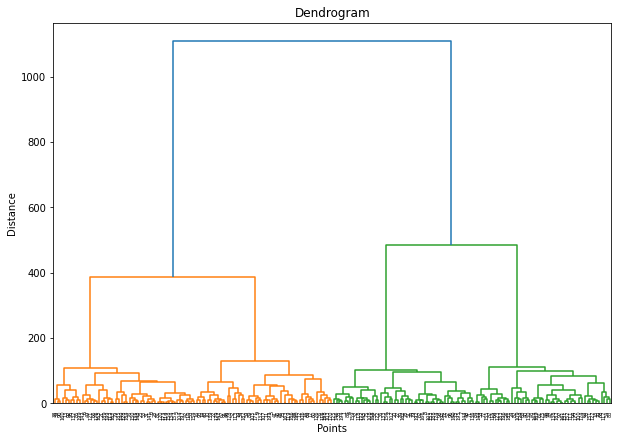

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data, 'ward')
fig = plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

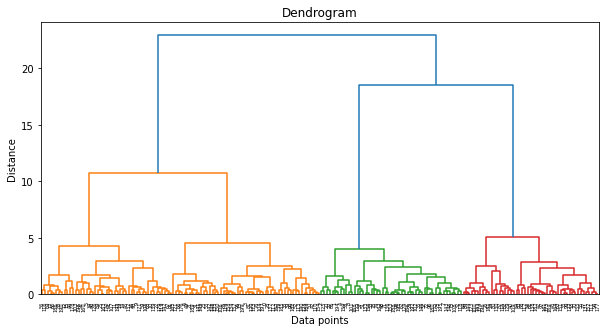

In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

from scipy.cluster.hierarchy import fcluster

max_dist = 5  # Maximum distance between clusters to form a new cluster
clusters = fcluster(Z, max_dist, criterion='distance')




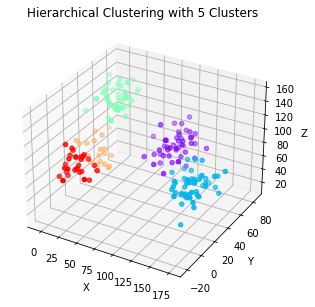

In [28]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x'], data['y'], data['z'], c=clusters, cmap='rainbow')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Hierarchical Clustering with {} Clusters'.format(np.unique(clusters).shape[0]))
plt.show()


The average silhouette score for the clusters is 0.44


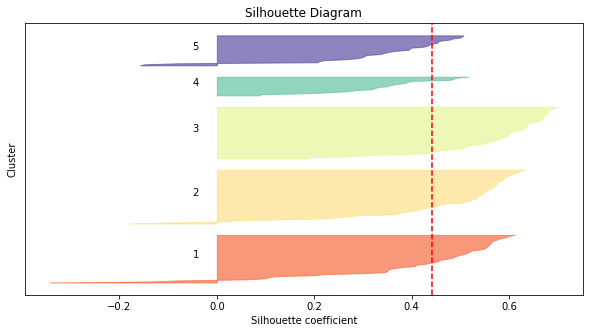

In [30]:

from sklearn.metrics import silhouette_samples, silhouette_score
max_dist = 5  # Maximum distance between clusters to form a new cluster
clusters = fcluster(Z, max_dist, criterion='distance')

silhouette_avg = silhouette_score(scaled_data, clusters)
print('The average silhouette score for the clusters is {:.2f}'.format(silhouette_avg))

sample_silhouette_values = silhouette_samples(scaled_data, clusters)

plt.figure(figsize=(10, 5))
y_lower = 10
for i in np.unique(clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.get_cmap('Spectral')(float(i) / np.unique(clusters).shape[0])
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.yticks([])
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')
plt.title('Silhouette Diagram')
plt.show()
